In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('C:/Users/moniq/Documents/TF_2_Notebooks_and_Data/DATA/cancer_classification.csv')

In [3]:
# see if have any null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [4]:
# look at distribution of dataset
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


<AxesSubplot:xlabel='benign_0__mal_1', ylabel='count'>

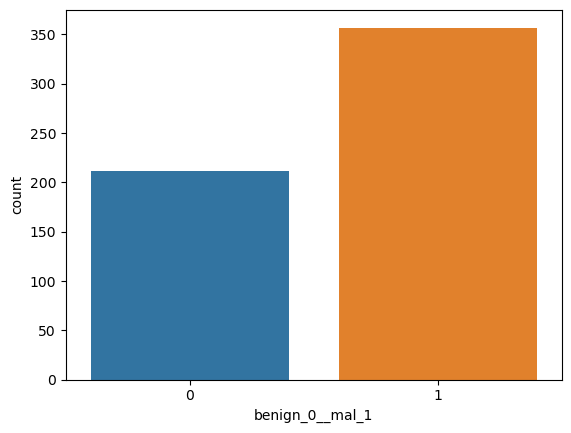

In [5]:
# see number of instances per label - see if well balanced problem or not
sns.countplot(x='benign_0__mal_1', data=df)
# difference not extreme, relatively well balance between benign and malignant

<AxesSubplot:>

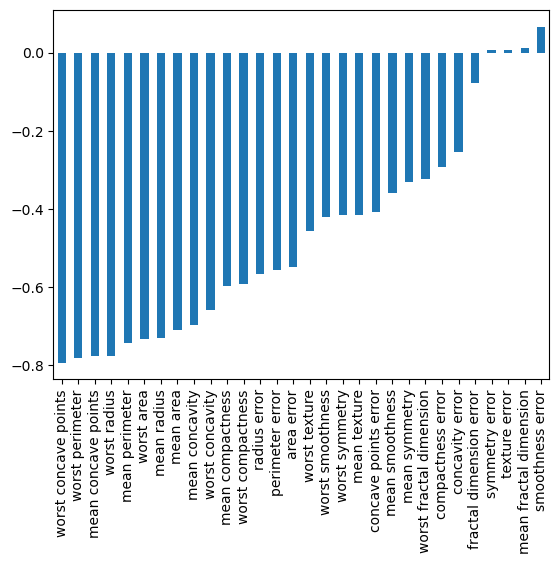

In [6]:
# look at correlation between features and y value
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

<AxesSubplot:>

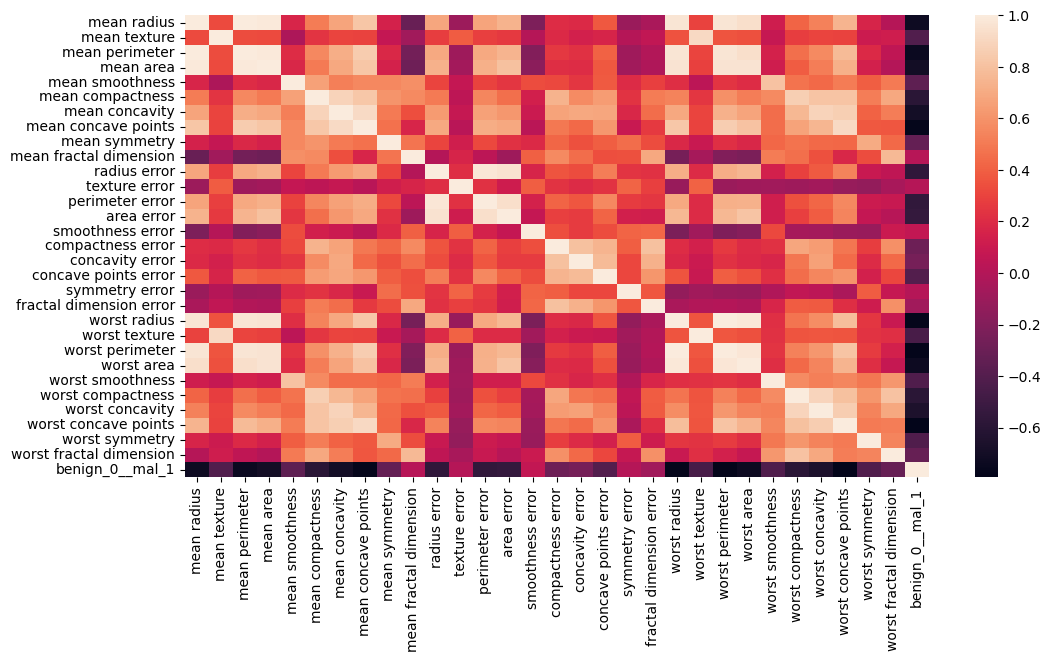

In [7]:
# correlation visualised as heatmap
plt.figure(figsize=(12,6))
sns.heatmap(df.corr())

In [8]:
# defining X and y values
X = df.drop('benign_0__mal_1', axis=1).values
y = df['benign_0__mal_1'].values

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
# run train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
# create instance of scaler
scaler = MinMaxScaler()

In [13]:
# scale and fit to training data
X_train = scaler.fit_transform(X_train)

In [14]:
# scale test data
X_test = scaler.transform(X_test)
# don't fit as not part of training data and don't want to cause data leakage

In [15]:
from tensorflow.keras.models import Sequential

In [16]:
from tensorflow.keras.layers import Dense, Dropout

In [17]:
X_train.shape

(426, 30)

In [19]:
model = Sequential()

model.add(Dense(30, activation='relu'))

model.add(Dense(15, activation='relu'))

# BINARY CLASSIFICATION
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [20]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test))

Epoch 1/600
14/14 [==============================] - 2s 33ms/step - loss: 0.6799 - val_loss: 0.6539
Epoch 2/600
14/14 [==============================] - 0s 8ms/step - loss: 0.6361 - val_loss: 0.6173
Epoch 3/600
14/14 [==============================] - 0s 8ms/step - loss: 0.6004 - val_loss: 0.5811
Epoch 4/600
14/14 [==============================] - 0s 7ms/step - loss: 0.5639 - val_loss: 0.5416
Epoch 5/600
14/14 [==============================] - 0s 8ms/step - loss: 0.5201 - val_loss: 0.4969
Epoch 6/600
14/14 [==============================] - 0s 9ms/step - loss: 0.4755 - val_loss: 0.4480
Epoch 7/600
14/14 [==============================] - 0s 9ms/step - loss: 0.4265 - val_loss: 0.3997
Epoch 8/600
14/14 [==============================] - 0s 7ms/step - loss: 0.3847 - val_loss: 0.3559
Epoch 9/600
14/14 [==============================] - 0s 6ms/step - loss: 0.3438 - val_loss: 0.3147
Epoch 10/600
14/14 [==============================] - 0s 8ms/step - loss: 0.3094 - val_loss: 0.2842
Epoch 11

14/14 [==============================] - 0s 5ms/step - loss: 0.0534 - val_loss: 0.0947
Epoch 84/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0525 - val_loss: 0.1005
Epoch 85/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0533 - val_loss: 0.0972
Epoch 86/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0540 - val_loss: 0.0990
Epoch 87/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0513 - val_loss: 0.0978
Epoch 88/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0534 - val_loss: 0.1031
Epoch 89/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0517 - val_loss: 0.0990
Epoch 90/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0538 - val_loss: 0.1006
Epoch 91/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0524 - val_loss: 0.1016
Epoch 92/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0527 - val_loss: 0.1067
Epoch 93/600


14/14 [==============================] - 0s 7ms/step - loss: 0.0425 - val_loss: 0.1167
Epoch 165/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0431 - val_loss: 0.1216
Epoch 166/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0421 - val_loss: 0.1283
Epoch 167/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0428 - val_loss: 0.1129
Epoch 168/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0424 - val_loss: 0.1330
Epoch 169/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0451 - val_loss: 0.1286
Epoch 170/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0412 - val_loss: 0.1214
Epoch 171/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0424 - val_loss: 0.1175
Epoch 172/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0411 - val_loss: 0.1213
Epoch 173/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0402 - val_loss: 0.1220
Epoc

14/14 [==============================] - 0s 7ms/step - loss: 0.0427 - val_loss: 0.1337
Epoch 246/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0335 - val_loss: 0.1357
Epoch 247/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0351 - val_loss: 0.1478
Epoch 248/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0344 - val_loss: 0.1262
Epoch 249/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0345 - val_loss: 0.1523
Epoch 250/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0347 - val_loss: 0.1417
Epoch 251/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0315 - val_loss: 0.1319
Epoch 252/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0362 - val_loss: 0.1377
Epoch 253/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0371 - val_loss: 0.1321
Epoch 254/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0312 - val_loss: 0.1556
Epoc

14/14 [==============================] - 0s 7ms/step - loss: 0.0263 - val_loss: 0.1568
Epoch 327/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0255 - val_loss: 0.1621
Epoch 328/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0257 - val_loss: 0.1560
Epoch 329/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0269 - val_loss: 0.1699
Epoch 330/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0357 - val_loss: 0.1564
Epoch 331/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0305 - val_loss: 0.1476
Epoch 332/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0275 - val_loss: 0.1652
Epoch 333/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0266 - val_loss: 0.1620
Epoch 334/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0260 - val_loss: 0.1636
Epoch 335/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0251 - val_loss: 0.1497
Epoc

14/14 [==============================] - 0s 4ms/step - loss: 0.0206 - val_loss: 0.1730
Epoch 408/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0245 - val_loss: 0.1994
Epoch 409/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0230 - val_loss: 0.1955
Epoch 410/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0214 - val_loss: 0.1955
Epoch 411/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0193 - val_loss: 0.1885
Epoch 412/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0188 - val_loss: 0.1877
Epoch 413/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0213 - val_loss: 0.1756
Epoch 414/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0201 - val_loss: 0.1888
Epoch 415/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0203 - val_loss: 0.1854
Epoch 416/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0193 - val_loss: 0.1923
Epoc

14/14 [==============================] - 0s 5ms/step - loss: 0.0136 - val_loss: 0.2040
Epoch 489/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0149 - val_loss: 0.2329
Epoch 490/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0120 - val_loss: 0.2092
Epoch 491/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0170 - val_loss: 0.2601
Epoch 492/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0144 - val_loss: 0.2186
Epoch 493/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0121 - val_loss: 0.2163
Epoch 494/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0150 - val_loss: 0.2486
Epoch 495/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0135 - val_loss: 0.2296
Epoch 496/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0119 - val_loss: 0.2291
Epoch 497/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0135 - val_loss: 0.2026
Epoc

14/14 [==============================] - 0s 4ms/step - loss: 0.0086 - val_loss: 0.2551
Epoch 570/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0080 - val_loss: 0.2545
Epoch 571/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0080 - val_loss: 0.2654
Epoch 572/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0090 - val_loss: 0.2368
Epoch 573/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0104 - val_loss: 0.2893
Epoch 574/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0138 - val_loss: 0.2826
Epoch 575/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0089 - val_loss: 0.2560
Epoch 576/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0079 - val_loss: 0.2638
Epoch 577/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0081 - val_loss: 0.2681
Epoch 578/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0110 - val_loss: 0.2375
Epoc

In [22]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

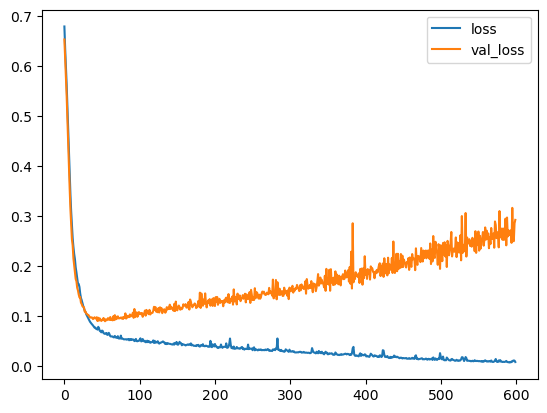

In [23]:
losses.plot()

In [24]:
model = Sequential()

model.add(Dense(30, activation='relu'))

model.add(Dense(15, activation='relu'))

# BINARY CLASSIFICATION
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [33]:
# use early stopping to avoid overfitting
from tensorflow.keras.callbacks import EarlyStopping

In [26]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [27]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test),
         callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 1s 10ms/step - loss: 0.6768 - val_loss: 0.6576
Epoch 2/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6390 - val_loss: 0.6217
Epoch 3/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6041 - val_loss: 0.5838
Epoch 4/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5666 - val_loss: 0.5439
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5263 - val_loss: 0.4989
Epoch 6/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4783 - val_loss: 0.4479
Epoch 7/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4327 - val_loss: 0.4025
Epoch 8/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3908 - val_loss: 0.3606
Epoch 9/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3581 - val_loss: 0.3268
Epoch 10/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3247 - val_loss: 0.2965
Epoch 11

In [30]:
model_loss = pd.DataFrame(model.history.history)

<AxesSubplot:>

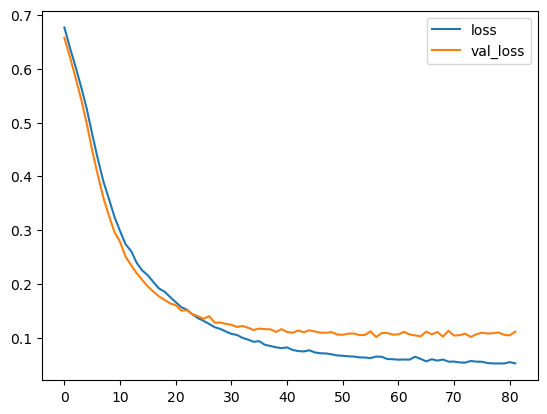

In [32]:
# validation loss should not be increasing
model_loss.plot()

In [34]:
# add drop off layers
from tensorflow.keras.layers import Dropout

In [35]:
model = Sequential()

model.add(Dense(30, activation='relu'))
# add rate in dropout - probability that you're going to randomly turn off neurons
model.add(Dropout(0.5))

model.add(Dense(15, activation='relu'))
model.add(Dropout(0.5))

# BINARY CLASSIFICATION
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [36]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [37]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test),
         callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 1s 8ms/step - loss: 0.7082 - val_loss: 0.6704
Epoch 2/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6827 - val_loss: 0.6567
Epoch 3/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6574 - val_loss: 0.6416
Epoch 4/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6475 - val_loss: 0.6216
Epoch 5/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6392 - val_loss: 0.6053
Epoch 6/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6161 - val_loss: 0.5848
Epoch 7/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5906 - val_loss: 0.5605
Epoch 8/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5727 - val_loss: 0.5344
Epoch 9/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5693 - val_loss: 0.5128
Epoch 10/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5328 - val_loss: 0.4913
Epoch 11/

14/14 [==============================] - 0s 3ms/step - loss: 0.1303 - val_loss: 0.0944
Epoch 84/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1186 - val_loss: 0.1028
Epoch 85/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1331 - val_loss: 0.0926
Epoch 86/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1239 - val_loss: 0.0957
Epoch 87/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1146 - val_loss: 0.1078
Epoch 88/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1222 - val_loss: 0.0801
Epoch 89/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1211 - val_loss: 0.0878
Epoch 90/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1391 - val_loss: 0.0883
Epoch 91/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1220 - val_loss: 0.0865
Epoch 92/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1196 - val_loss: 0.0790
Epoch 93/600


In [38]:
model_loss = pd.DataFrame(model.history.history)

<AxesSubplot:>

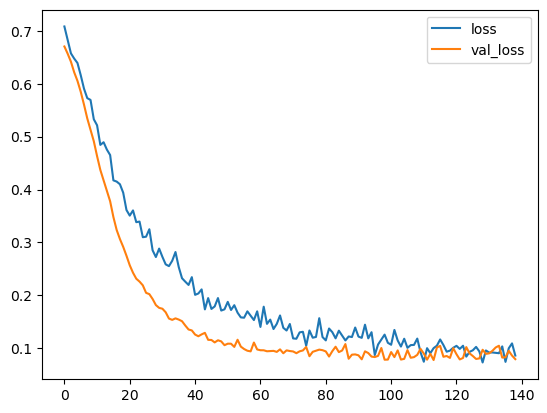

In [39]:
model_loss.plot()
# both training and validation loss are quickly going down and flattening out at same rate  - much improved from original plot - significantly improved performance

In [47]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

5/5 [==============================] - 0s 844us/step


In [48]:
from sklearn.metrics import classification_report, confusion_matrix

In [49]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        55
           1       0.99      0.98      0.98        88

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [50]:
print(confusion_matrix(y_test, predictions))

[[54  1]
 [ 2 86]]
